In [152]:
#Load Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import folium 
import seaborn as sns 
import pycountry_convert as pyc
import datetime as dt 
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [235]:
us_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv')
us_cases.head()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [3]:
us_cases.shape

(2485, 12)

In [4]:
us_cases = us_cases.loc[us_cases['Country_Region'] == 'US']
us_cases.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [5]:
us_cases.shape

(2230, 12)

In [353]:
#Let drop and rename columns 
# usa_df = us_cases.drop(['Combined_Key', 'FIPS'], axis=1)
usa_df.head()

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0
1,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0
2,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0
3,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0
4,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0


In [126]:
#Rename Columns for accurate description 
usa_df_clean = usa_df.rename(columns={'Admin2': 'City',
                      'Province_State': 'State'})


usa_df_clean.head()

,City,State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0
1,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0
2,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0
3,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0
4,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0


In [127]:
usa_df_clean['City_State'] = usa_df_clean['City'] + ", " + usa_df_clean['State']

usa_df_clean.head()

,City,State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,City_State
0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina"
1,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana"
2,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia"
3,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho"
4,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa"


In [9]:
#Let see the total confirmed and deaths as of 4/2/2020 

total_sum = usa_df_clean.sum()

total_df = pd.DataFrame(total_sum).transpose().loc[:,['Confirmed','Deaths']]

total_df['Mortality Rate in US (%)'] = np.round(total_df['Deaths']/total_df['Confirmed'] * 100,2)

total_df

,Confirmed,Deaths,Mortality Rate in US (%)
0,213372.0,4757.0,2.23


In [348]:
#They included US territories as well Guam, Puerto Rico, and the two cruise ships 
state_by_state = usa_df_clean[['State','Confirmed', 'Deaths']]


In [349]:
#Created a sub DF for the scatter geo map 
usa_df_clean = usa_df_clean[['City', 'State', 'Last_Update', 'Lat', 'Long_','Confirmed','Deaths']]
usa_cleaned = usa_df_clean.dropna(how='any')
usa_cleaned.head()

,City,State,Last_Update,Lat,Long_,Confirmed,Deaths
0,Abbeville,South Carolina,2020-04-01 21:58:49,34.223334,-82.461707,4,0
1,Acadia,Louisiana,2020-04-01 21:58:49,30.295065,-92.414197,47,1
2,Accomack,Virginia,2020-04-01 21:58:49,37.767072,-75.632346,7,0
3,Ada,Idaho,2020-04-01 21:58:49,43.452658,-116.241552,195,3
4,Adair,Iowa,2020-04-01 21:58:49,41.330756,-94.471059,1,0


In [351]:
usa_cleaned['Mortality Rate'] = np.round((usa_cleaned['Deaths'])/(usa_cleaned['Confirmed']) * 100, 2)

usa_cleaned.head()

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,City,State,Last_Update,Lat,Long_,Confirmed,Deaths,Mortality Rate
0,Abbeville,South Carolina,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0.00
1,Acadia,Louisiana,2020-04-01 21:58:49,30.295065,-92.414197,47,1,2.13
2,Accomack,Virginia,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0.00
3,Ada,Idaho,2020-04-01 21:58:49,43.452658,-116.241552,195,3,1.54
4,Adair,Iowa,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0.00


In [354]:
#Let see which states are most affected 
fifty_two_states = state_by_state.groupby(['State'])['Confirmed', 'Deaths'].sum().sort_values('Confirmed', ascending=False)
# .style.background_gradient(cmap ='Blues', subset=['Confirmed']).background_gradient(cmap ='Reds', subset=['Deaths'])
fifty_two_states.head(10)


,Confirmed,Deaths
State,,
New York,83948,1941
New Jersey,22255,355
California,9399,199
Michigan,9315,335
Massachusetts,7738,122
Illinois,6980,141
Florida,6956,87
Louisiana,6424,273
Pennsylvania,6009,74


In [355]:
#Removed the territories to only show the 52 states 
fifty_two_states_df = fifty_two_states.iloc[:52]
fifty_two_states_df.reset_index().head()

,State,Confirmed,Deaths
0,New York,83948,1941
1,New Jersey,22255,355
2,California,9399,199
3,Michigan,9315,335
4,Massachusetts,7738,122


In [110]:
state_mort = fifty_two_states_df.groupby(['State'])['Confirmed', 'Deaths'].sum().sort_values('Confirmed', ascending = False)
state_mort['Mortality Rate %'] = np.round(state_mort['Deaths']/state_mort['Confirmed'] * 100, 2)
state_mort.head()

,Confirmed,Deaths,Mortality Rate %
State,,,
New York,83948,1941,2.31
New Jersey,22255,355,1.60
California,9399,199,2.12
Michigan,9315,335,3.60
Massachusetts,7738,122,1.58


In [344]:
state_mort_df = state_mort.reset_index()
state_mort_df.shape

(52, 4)

In [346]:
#Load US States with codes for choropleth map 
us_abbv = pd.read_csv('Resources/us_states.csv')
state_codes = state_mort_df.merge(us_abbv, on='State')

#Check to see same rows so merge was successful 
state_codes.shape

(52, 5)

In [257]:
us_confirmed = pd.read_csv('Resources/time_series_covid19_confirmed_US.csv')
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,15,27,29,32,37,45,51,55,56,58
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,0,0,0,0,0,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,21,23,31,39,51,64,79,100,127,174
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,7,17,17,17,19,22,0,0


In [261]:
us_confirmed_df = us_confirmed.iloc[:, 5:]
us_confirmed_df.head()

,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/2020,1/23/2020,1/24/2020,1/25/2020,...,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,...,15,27,29,32,37,45,51,55,56,58
2,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,...,21,23,31,39,51,64,79,100,127,174
4,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,...,6,6,7,17,17,17,19,22,0,0


In [270]:
#Rename Columns 
us_confirmed_clean = us_confirmed_df.drop(['Country_Region', 'Combined_Key'], axis=1)
us_confirmed_clean.head()

,Admin2,Province_State,Lat,Long_,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
0,NaN,American Samoa,-14.2710,-170.1320,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,13.4443,144.7937,0,0,0,0,0,0,...,15,27,29,32,37,45,51,55,56,58
2,NaN,Northern Mariana Islands,15.0979,145.6739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Puerto Rico,18.2208,-66.5901,0,0,0,0,0,0,...,21,23,31,39,51,64,79,100,127,174
4,NaN,Virgin Islands,18.3358,-64.8963,0,0,0,0,0,0,...,6,6,7,17,17,17,19,22,0,0


In [274]:
confirmed_us_df = us_confirmed_clean.rename(columns={'Admin2': 'City',
                               'Province_State':'State'})

confirmed_us_df.head()

,City,State,Lat,Long_,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
0,NaN,American Samoa,-14.2710,-170.1320,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Guam,13.4443,144.7937,0,0,0,0,0,0,...,15,27,29,32,37,45,51,55,56,58
2,NaN,Northern Mariana Islands,15.0979,145.6739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Puerto Rico,18.2208,-66.5901,0,0,0,0,0,0,...,21,23,31,39,51,64,79,100,127,174
4,NaN,Virgin Islands,18.3358,-64.8963,0,0,0,0,0,0,...,6,6,7,17,17,17,19,22,0,0


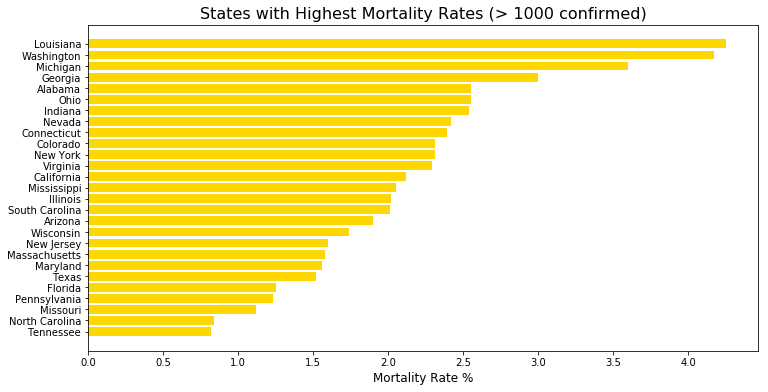

In [359]:
#States with the highest mortality with more than 1000 confirmed cases. The median was 1066 for confirmed cases.

fig = plt.figure(figsize=(12,6))
# plt.xlim(.5, 7)

plt.barh(state_mort.loc[state_mort['Confirmed'] > 1000].sort_values('Mortality Rate %')['Mortality Rate %'].index,
         state_mort.loc[state_mort['Confirmed'] > 1000].sort_values('Mortality Rate %')['Mortality Rate %'].values, color='gold')
plt.title("States with Highest Mortality Rates (> 1000 confirmed)", fontsize=16)
plt.xlabel('Mortality Rate %', fontsize=12)
plt.savefig('Images/states_high_mortality.png')
plt.show()

In [97]:
# usa_df_clean= usa_df_clean.drop(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Recovered', 'Active', 'City', 'State'], axis=1)

#Created a DF with top 10 cities based on number of deaths 
top_ten_df = usa_df_clean.sort_values('Deaths', ascending=False)[:11].set_index('City_State')

top_ten_df.style.background_gradient(cmap='OrRd')
#Dropped the second NY Row since it had an unassigned city 

i = top_ten_df[top_ten_df['Confirmed'] == 0].index

# top_ten_mort = top_ten_df.drop(i)
top_ten_mort.style.background_gradient(cmap='OrRd')

,Confirmed,Deaths
City_State,,
"New York City, New York",47439,1139
"King, Washington",2330,150
"Wayne, Michigan",4470,146
"Orleans, Louisiana",2270,115
"Oakland, Michigan",1910,99
"Cook, Illinois",5152,95
"Nassau, New York",9554,76
"Bergen, New Jersey",3494,75
"Essex, New Jersey",2262,69


In [105]:
top_ten_mort['Mortality Rate %'] = np.round(top_ten_mort['Deaths']/top_ten_mort['Confirmed'] * 100, 2)
top_ten_mort.style.background_gradient(cmap='OrRd')

,Confirmed,Deaths,Mortality Rate %
City_State,,,
"New York City, New York",47439,1139,2.4
"King, Washington",2330,150,6.44
"Wayne, Michigan",4470,146,3.27
"Orleans, Louisiana",2270,115,5.07
"Oakland, Michigan",1910,99,5.18
"Cook, Illinois",5152,95,1.84
"Nassau, New York",9554,76,0.8
"Bergen, New Jersey",3494,75,2.15
"Essex, New Jersey",2262,69,3.05


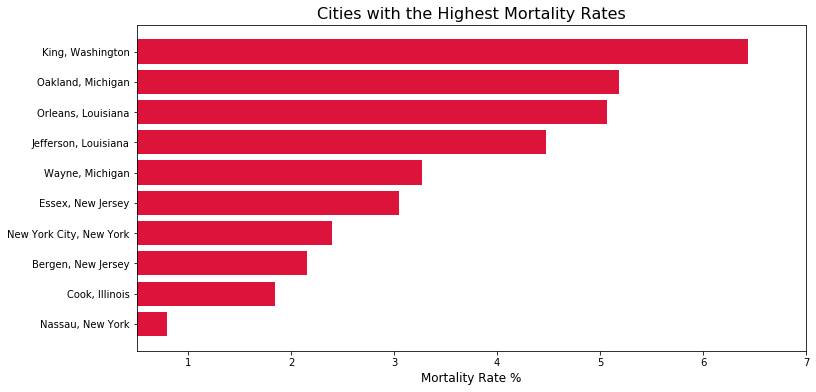

In [360]:
#States with the highest mortality in areas with at least 1000 confirmed cases 
fig = plt.figure(figsize=(12,6))
plt.xlim(.5, 7)
plt.barh(top_ten_mort.sort_values('Mortality Rate %')['Mortality Rate %'].index,
         top_ten_mort.sort_values('Mortality Rate %')['Mortality Rate %'].values, color='crimson')
plt.title("Cities with the Highest Mortality Rates", fontsize=16)
plt.xlabel('Mortality Rate %', fontsize=12)
plt.savefig('Images/cities_high_mortality.png')
plt.show()

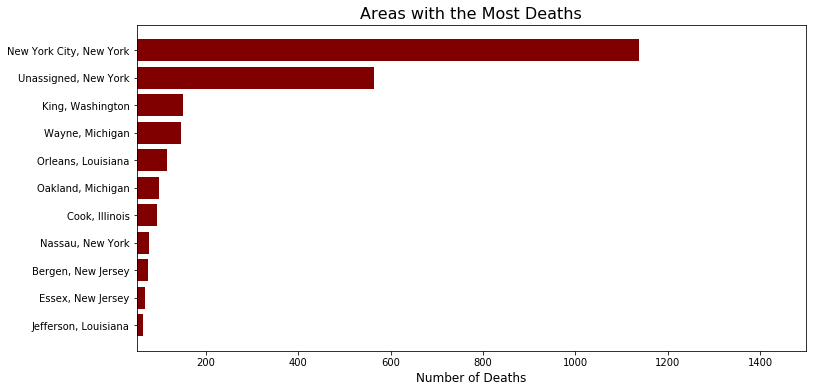

In [362]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot()
plt.xlim(50,1500)

plt.barh(top_ten_df.sort_values('Deaths')['Deaths'].index,
         top_ten_df.sort_values('Deaths')['Deaths'].values, color='maroon')

plt.title('Areas with the Most Deaths', fontsize=16)
plt.xlabel('Number of Deaths', fontsize=12)
plt.savefig('Images/cities_most_deaths.png')
plt.show()

In [102]:
top_ten_conf = usa_df_clean.sort_values('Confirmed', ascending= False).set_index('City_State')[:10]
top_ten_conf.style.background_gradient(cmap='OrRd')

,Confirmed,Deaths
City_State,,
"New York City, New York",47439,1139
"Westchester, New York",10683,25
"Nassau, New York",9554,76
"Suffolk, New York",7605,53
"Cook, Illinois",5152,95
"Unassigned, New Jersey",4512,0
"Wayne, Michigan",4470,146
"Los Angeles, California",3518,64
"Bergen, New Jersey",3494,75


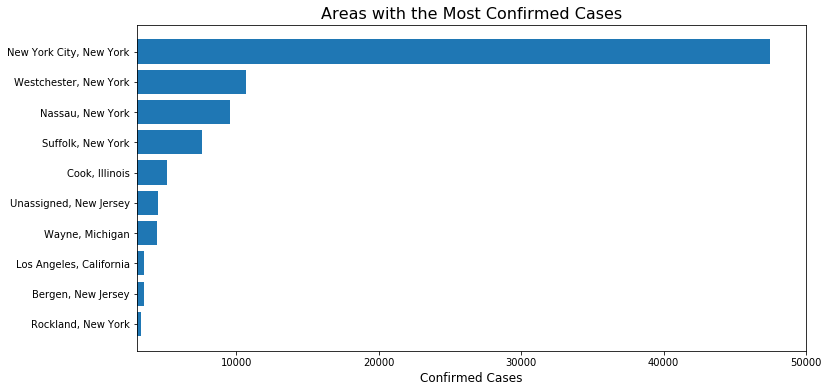

In [104]:
#States with the most confirmed cases. It's clear that New York is the epicenter in the US.
plt.figure(figsize=(12,6))
plt.xlim(3000, 50000)

plt.barh(top_ten_conf.sort_values('Confirmed')['Confirmed'].index,
         top_ten_conf.sort_values('Confirmed')['Confirmed'].values)
plt.title('Areas with the Most Confirmed Cases', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.show()

In [363]:
usa_cleaned['']



,City,State,Last_Update,Lat,Long_,Confirmed,Deaths,Mortality Rate
0,Abbeville,South Carolina,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0.00
1,Acadia,Louisiana,2020-04-01 21:58:49,30.295065,-92.414197,47,1,2.13
2,Accomack,Virginia,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0.00
3,Ada,Idaho,2020-04-01 21:58:49,43.452658,-116.241552,195,3,1.54
4,Adair,Iowa,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0.00


# Map Visualizations

In [185]:
usa_cleaned['text'] = usa_cleaned['City'] + ', ' + usa_cleaned['State'] + ' | ' + 'Confirmed Cases: ' + usa_cleaned['Confirmed'].astype(str) + ' | ' + 'Deaths: ' + usa_cleaned['Deaths'].astype(str) + ' | ' + 'Mortality Rate (%): ' + usa_cleaned['Mortality Rate'].astype(str)



fig = go.Figure(data=go.Scattergeo(
                lon = usa_cleaned['Long_'],
                lat = usa_cleaned['Lat'],
                mode= 'markers',
                text= usa_cleaned['text']))


fig.update_layout(
        title = 'Affected Cities in the USA',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(169,169,169)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(176, 224, 230)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig.show()

In [343]:
fig2 = go.Figure(data=go.Choropleth(locations= state_codes['Code'],
                                   z=state_codes['Confirmed'],
                                   locationmode='USA-states',
                                   colorscale='electric',
                                   colorbar_title= 'Confirmed Cases'))

fig2.update_layout(
                title_text = 'Confirmed Cases as of 4/1/2020',
                geo_scope='usa')
fig2.show()

In [347]:
fig3 = go.Figure(data=go.Choropleth(locations= state_codes['Code'],
                                   z=state_codes['Deaths'],
                                   locationmode='USA-states',
                                   colorscale='Reds',
                                   colorbar_title= 'Confirmed Cases'))

fig3.update_layout(
                title_text = 'Deaths as of 4/1/2020',
                geo_scope='usa')
fig3.show()